In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules
sys.path.append("Codigos")

if IN_COLAB:
    from google.colab import drive
    drive.mount("/content/gdrive/")
    %cd "/content/gdrive/My Drive/Colab Notebooks/bikes-theft-model"
else:
    %cd "../"

# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import datetime as dt

# Library for boxplots
import seaborn as sns
import pandas as pd

#GRAPHS CLASS
from Codigos.DataStatistics import GraphsStatistics as gp


Mounted at /content/gdrive/
/content/gdrive/My Drive/Colab Notebooks/bikes-theft-model


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/IMT Atlantique/Data Science/Project Bycicle/bikes-theft-model/Correlation/data.csv')

In [ ]:
df.drop(columns = ['GeoUID', 'Type', 'Region Name'], inplace = True)
df.replace({ -np.inf : np.nan, np.inf: np.nan, 'None': np.nan, 'x': np.nan}, inplace=True)

In [ ]:
for col in df.columns :
  if df[col].dtype == 'object':
    df[col] = df[col].astype('float')
    


In [ ]:
df.columns

Index(['Area (sq km)', 'Population ', 'Dwellings ', 'Households ',
       'v_CA16_4951: Total - Income statistics in 2015 for the population aged 15 years and over in private households - 25% sample data',
       'v_CA16_4952: Total - Income statistics in 2015 for the population aged 15 years and over in private households - 25% sample data',
       'v_CA16_4953: Total - Income statistics in 2015 for the population aged 15 years and over in private households - 25% sample data',
       'v_CA16_4984: Total - Income statistics in 2015 for private households by household size - 25% sample data',
       'v_CA16_4987: Total - Income statistics in 2015 for one-person private households - 25% sample data',
       'v_CA16_4990: Total - Income statistics in 2015 for two-or-more-person private households - 25% sample data',
       'v_CA16_4993: Total - Income statistics in 2015 for economic families in private households - 25% sample data',
       'v_CA16_4996: Total - Income statistics in 2015 

In [ ]:
lista = df.columns.to_list()

for idx in lista :
  if len(idx) > 15:
    id=idx.split(':')[0]    
    df = df.rename(columns= {idx : id}) 

In [ ]:
def change_name(df, lista):
  
  try:
    df.drop(columns = ['GeoUID', 'Type', 'Region Name'], inplace = True)
  except:
    pass
  if (df == 'x').any().any():
    df.replace({ -np.inf : np.nan, np.inf: np.nan, 'None': np.nan, 'x': np.nan}, inplace=True)

  for col in df.columns :
    if df[col].dtype == 'object':
      df[col] = df[col].astype('float')

  for idx in lista :
    if len(idx) > 15:
      id=idx.split(':')[0]    
      df = df.rename(columns= {idx : id})  

  correlation_mat = df.corr()

  f, ax = plt.subplots(figsize=(17, 9))
  sns.heatmap(correlation_mat, annot = True)

  plt.show()
    
  return df

In [ ]:
df

,Area (sq km),Population,Dwellings,Households,v_CA16_4951,v_CA16_4952,v_CA16_4953,v_CA16_4984,v_CA16_4987,v_CA16_4990,v_CA16_4993,v_CA16_4996,v_CA16_4999,v_CA16_6751,v_CA16_6752,v_CA16_6753,v_CA16_5002,v_CA16_5006,v_CA16_5005,v_CA16_5007,v_CA16_2605,v_CA16_2604,v_CA16_2606,v_CA16_2614,v_CA16_2613,v_CA16_2615,v_CA16_5807
0,6.62211,595,274,247,505.0,300.0,210.0,245.0,75.0,175.0,170.0,80.0,65.0,505.0,295.0,205.0,20.0,80.0,120.0,40.0,315.0,565.0,245.0,110.0,185.0,75.0,30.0
1,3.29470,620,279,270,605.0,270.0,330.0,285.0,65.0,225.0,210.0,100.0,70.0,605.0,270.0,335.0,30.0,40.0,100.0,65.0,290.0,650.0,360.0,55.0,115.0,65.0,75.0
2,0.94253,749,267,258,420.0,200.0,220.0,265.0,130.0,135.0,130.0,50.0,30.0,425.0,200.0,220.0,40.0,70.0,150.0,80.0,220.0,455.0,235.0,85.0,205.0,120.0,20.0
3,0.34347,6686,3609,3455,5710.0,2845.0,2860.0,3450.0,1800.0,1645.0,1365.0,535.0,455.0,5710.0,2845.0,2865.0,290.0,1410.0,2565.0,1155.0,3045.0,6045.0,3000.0,1500.0,3155.0,1660.0,385.0
4,0.37612,6424,3729,3424,5525.0,2635.0,2895.0,3425.0,1725.0,1700.0,1410.0,585.0,385.0,5530.0,2630.0,2895.0,340.0,1225.0,2380.0,1160.0,2835.0,5880.0,3045.0,1265.0,2670.0,1405.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,1.66052,4761,1165,1144,3885.0,1910.0,1975.0,1135.0,45.0,1095.0,1080.0,90.0,850.0,3890.0,1915.0,1975.0,90.0,50.0,100.0,50.0,2280.0,4545.0,2270.0,1750.0,3630.0,1885.0,10.0
568,20.22490,5806,1556,1530,4620.0,2185.0,2435.0,1530.0,135.0,1400.0,1390.0,130.0,1000.0,4620.0,2185.0,2440.0,210.0,160.0,310.0,155.0,2705.0,5575.0,2870.0,1845.0,3880.0,2035.0,0.0
569,2.25257,7175,2041,1925,6020.0,2910.0,3110.0,1925.0,170.0,1755.0,1760.0,230.0,1070.0,6020.0,2915.0,3105.0,380.0,150.0,360.0,210.0,3380.0,6940.0,3560.0,1830.0,3645.0,1815.0,0.0
570,2.21600,3829,1290,1267,3095.0,1505.0,1590.0,1255.0,140.0,1115.0,1110.0,305.0,640.0,3095.0,1505.0,1590.0,155.0,65.0,180.0,115.0,1845.0,3705.0,1860.0,645.0,1430.0,790.0,0.0


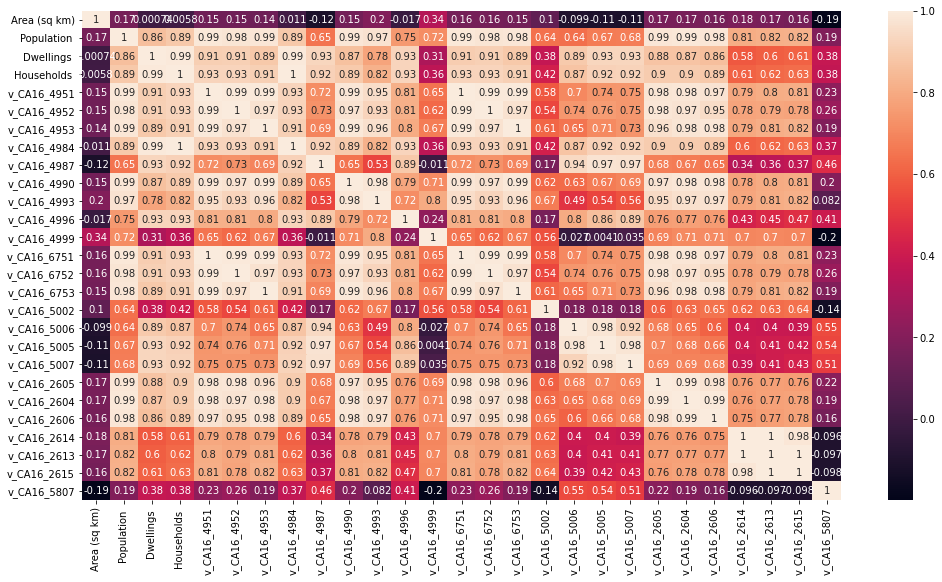

In [ ]:
# import seaborn as sns

# import matplotlib.pyplot as plt

# # taking all rows but only 6 columns


# correlation_mat = df.corr()

# f, ax = plt.subplots(figsize=(17, 9))
# sns.heatmap(correlation_mat, annot = True)

# plt.show()

df = change_name(df, df.columns.to_list())

In [ ]:
df2 = pd.read_csv('/content/gdrive/MyDrive/IMT Atlantique/Data Science/Project Bycicle/bikes-theft-model/Correlation/data2.csv')

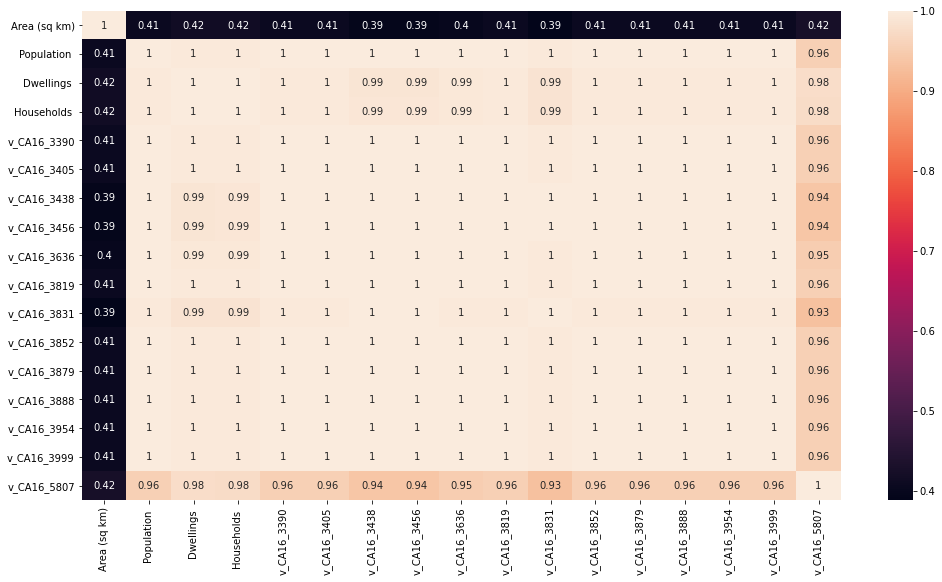

In [ ]:
df2 = change_name(df2, df2.columns.to_list())

In [ ]:
df3 =pd.read_csv('/content/gdrive/MyDrive/IMT Atlantique/Data Science/Project Bycicle/bikes-theft-model/Correlation/data3.csv')

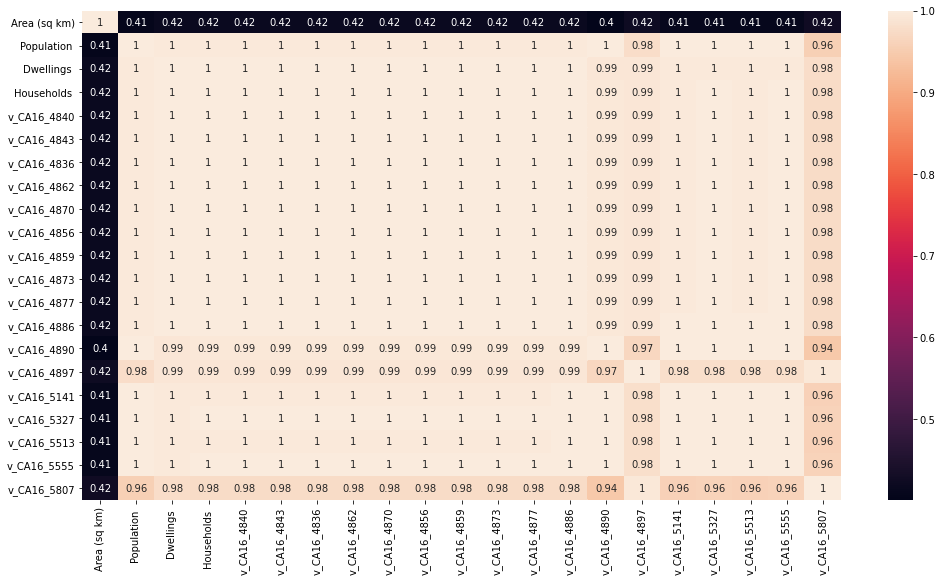

In [ ]:
df3 = change_name(df3, df3.columns.to_list())

In [ ]:
df4 =pd.read_csv('/content/gdrive/MyDrive/IMT Atlantique/Data Science/Project Bycicle/bikes-theft-model/Correlation/data4.csv')

In [ ]:
df4 = change_name(df4, df4.columns.to_list())

In [16]:
def plot_corr(df):
    correlation_mat = df.corr()
    f, ax = plt.subplots(figsize=(17, 9))
    sns.heatmap(correlation_mat, annot = True)
    plt.show()

# Analysis from January 1st to "until_date" in month-day format. Columns format short or long
def fields_census_analysis(census_path, theft_path = "/content/gdrive/MyDrive/IMT Atlantique/Data Science/Project Bycicle/bikes-theft-model/Data/Bicycle_Thefts_Toronto_geo.csv", until_date = "01-15", columns_short = True): 
    # Read data and clean
    df_census = pd.read_csv(census_path,dtype = {"GeoUID":str}, header=0).drop(columns = ["Type", "Region Name"]).replace({"x":np.nan, "F":np.nan})
    df_census["GeoUID"] = df_census["GeoUID"].apply(lambda x: x if len(x.split(".")[-1]) > 1 else x + "0") # Fix important bug
    for col in df_census: # Type change
        df_census[col] = df_census[col].astype(float) if col != "GeoUID" else df_census[col]
    df_theft = pd.read_csv(theft_path, dtype = {"GeoUID":str})
    df_theft["GeoUID"] = df_theft["GeoUID"].apply(lambda x: x if len(x.split(".")[-1]) > 1 else x + "0") # Fix important bug

    # Data process: Get Total theft by sum registers and mean cost of bike by CT and date
    df_theft["Occurrence_Date"] = pd.to_datetime(df_theft["Occurrence_Date"])
    
    df_theft = df_theft[df_theft["Status"] == "STOLEN"].groupby(["GeoUID", pd.Grouper(key="Occurrence_Date", freq="1W-MON")]).\
        agg({"X":"count", "Cost_of_Bike":"mean", "Occurrence_Year":lambda x: x.iloc[0]}).\
        reset_index().rename(columns={"X":"Total_Theft_Bikes"}).sort_values("Occurrence_Date")

    display(df_theft.columns, df_census.columns)
    # Process by year: Split data in "date"-columns to ['Total_Theft_Bikes', 'Cost_of_Bike']
    for year in df_theft["Occurrence_Year"].unique():
        df_theft_year = df_theft[df_theft["Occurrence_Year"] == year].drop(columns = "Occurrence_Year")
        df_theft_year = df_theft_year[df_theft_year["Occurrence_Date"] <= "{}-{}".format(year, until_date)]
        df_theft_year = df_theft_year.pivot(index = 'GeoUID', columns = 'Occurrence_Date', values = ['Total_Theft_Bikes', 'Cost_of_Bike'])

        # Fix columns names
        df_theft_year = df_theft_year.T.reset_index().T
        df_theft_year.columns = df_theft_year.T["level_0"] + "in" + df_theft_year.T["Occurrence_Date"].astype(str) # New name
        df_theft_year = df_theft_year.drop(["level_0", "Occurrence_Date"])
        
        # Merge data with census info and corr plot
        df_census_theft = df_census.merge(df_theft_year, left_on = "GeoUID", right_index = True, how = "left").fillna(0) # NaN = 0 thefts
        for col_theft in [x for x in df_census_theft.columns if "Theft" in x]:
            df_census_theft["%{}/Area".format(col_theft)] = df_census_theft[col_theft] * 100.0
            df_census_theft["%{}/Area".format(col_theft)] /= df_census_theft['v_CA16_5807: Bicycle'] * df_census_theft['Area (sq km)']
        if columns_short:
            df_census_theft.columns = [x[:32] for x in df_census_theft.columns] # 8 characters maximum
        plot_corr(df_census_theft)

fields_census_analysis(census_path = "/content/gdrive/MyDrive/IMT Atlantique/Data Science/Project Bycicle/bikes-theft-model/Correlation/data.csv")

KeyError: ignored